In [1]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd

In [3]:
path = '../data/l5/201801-citibike-tripdata.csv.zip'
df = pd.read_csv(path)
df['tripduration']  /= 60

In [4]:
mask = df.tripduration <= 60 # less than an hour

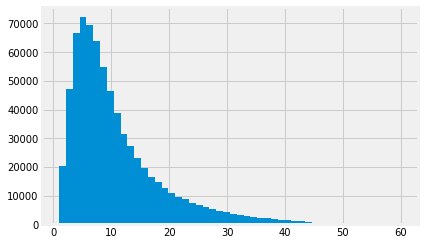

In [5]:
POP = df.loc[mask, 'tripduration']
POP.hist(bins=50)

In [6]:
POP.shape

(716571,)

In [203]:
SAMPLES = 2000
pd.np.random.seed(100)

In [ ]:
sampe_means = [POP.sample(1000).mean() for el in range(SAMPLES)] 

In [ ]:
pd.Series(sampe_means).hist(bins=50)

вверху = T-distr

# T-test

In [16]:
import scipy.stats as stats

In [34]:
sample = POP.sample(1000)

In [35]:

stats.ttest_1samp(a = sample,               # Sample data
                  popmean= POP.mean())              # Pop mean

Ttest_1sampResult(statistic=-0.4665886761291446, pvalue=0.6408959208301943)

In [139]:
pd.np.random.seed(100)
sample = POP.sample(50) * .7  # corrupt data

In [141]:
sample.mean()

8.060033333333333

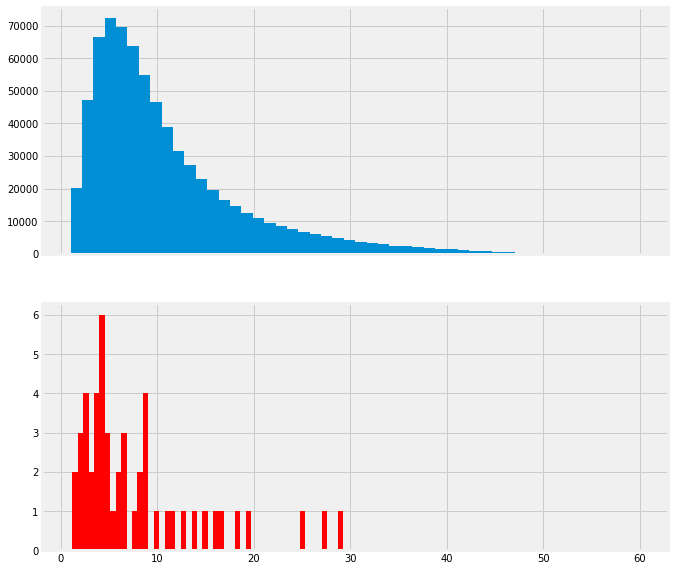

In [142]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
POP.hist(bins=50, ax=axes[0])
sample.hist(bins=50, ax=axes[1], color='red')

In [143]:

stats.ttest_1samp(a = sample,               # Sample data
                  popmean= POP.mean())              # Pop mean

Ttest_1sampResult(statistic=-3.0619921999179267, pvalue=0.0035648433933430884)

In [151]:
for q in .025, (1-.025):
    print( stats.t.ppf(q=q,            # Quantile to check
                       df=len(sample)-1))  # Degrees of freedom

-2.0095752344892093
2.009575234489209


## p-value

In [153]:
?stats.t.cdf

Signature: stats.t.cdf(x, *args, **kwds)
Docstring:
Cumulative distribution function of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
cdf : ndarray
    Cumulative distribution function evaluated at `x`
File:      ~/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


In [152]:
stats.t.cdf(x=  -3.0619921999179267,      # T-test statistic
            df= len(sample)-1) * 2   # Mupltiply by two for two tailed test*

0.0035648433933430884

In [154]:
stats.t.cdf(x=  -3.0619921999179267,
            df= len(sample)-1) * 2     < .05

True

p-value - это вероятность получения настолько - или более - отклоняющегося от "нормы" результата

# Нулевая Гипотеза

Нулевая гипотеза - это базовое ( по умолчению) предположение что между двумя событиями нет связи. Задача исследователя - доказать фактами что нулевую гипотезу можно отбросить - шанс что наблюдаемые взаимосвязи случайны достаточно низок.

В нашем (и большинстве) случаев нулевая гипотеза глачит что наблюдаемый результат вполне вписывается в "норму". Необходимо доказать что наблюдаемый/полученый результат достаточно отклоняется от "нормы", чтобы считать его значимым, например:

(ВСЕ ПРИМЕРЫ ПРИДУМАННЫ)
* Применение лекарства X привело к улучшению состояния у пацеиентов в значительной степени, что позволяет говорить, что лекарство действут
* Наблюдаемые Мадагаскарские мыши имеют значительно более длинный хвост, что позволяет говорить о том, что это отдельный подвид
* генно-модифицированные семена принесли в ДОСТАТОЧНОЙ МЕРЕ больше урожая чтобы говорить об эффективности метода

* [P-hacking](https://projects.fivethirtyeight.com/p-hacking/)

# Представляют ли две выборки (sample) единуую генеральную совокупность (Population)?

## Paired T-Test


In [20]:
S = df.loc[(mask & (df.usertype=='Subscriber')), 'tripduration']
C = df.loc[(mask & (df.usertype=='Customer')), 'tripduration']

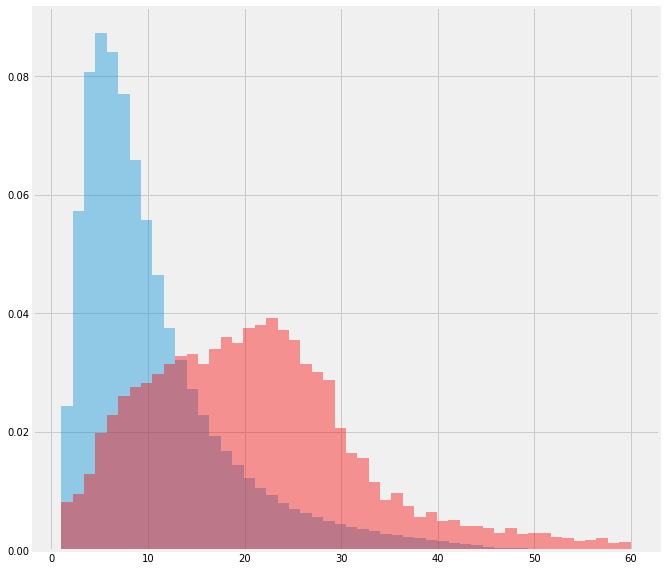

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True)
S.hist(bins=50, ax=axes, density=True, alpha=.4)
C.hist(bins=50, ax=axes, density=True, color='red', alpha=.4)

In [44]:
stats.ttest_ind(a=S, b=C, equal_var=False)

Ttest_indResult(statistic=-132.790269948001, pvalue=0.0)

# Мужчины и женщины

In [10]:
male = df.loc[(mask & (df.gender==1)), 'tripduration']
female = df.loc[(mask & (df.gender==2)), 'tripduration']

In [11]:
male.mean(), male.median()

(10.456873254415525, 8.1)

In [13]:
female.mean(), female.median()

(11.731382344842777, 9.266666666666667)

In [37]:
len(female), len(male)

(151325, 536592)

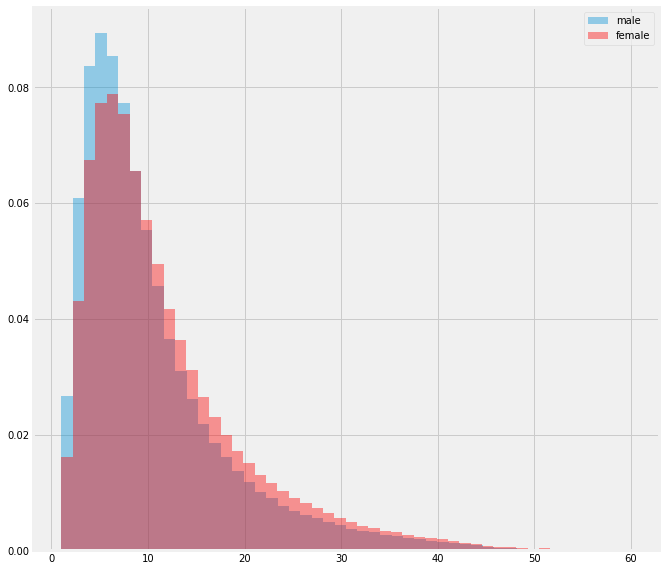

In [49]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True)
male.hist(bins=50, ax=axes, alpha=.4, density=True, label='male')
female.hist(bins=50, ax=axes, color='red', alpha=.4, density=True, label='female')
plt.legend()

In [50]:
stats.ttest_ind(a=male, b=female, equal_var=False)

Ttest_indResult(statistic=-52.828582128356864, pvalue=0.0)

* Достаточно ли у нас оснований сказать, что женщины ездят дольше/меньше чем мужчины? 

* Значит ли это что мужчины в Америке/Нью-Йорке ездят меньше/быстрее?

# Ошибки первого и второго типа

* Type I - ошибочно отбросить нулевую гипотезу (False Positive)
* Type II - ошибочно держаться нулевой гипотезы (False Negative)

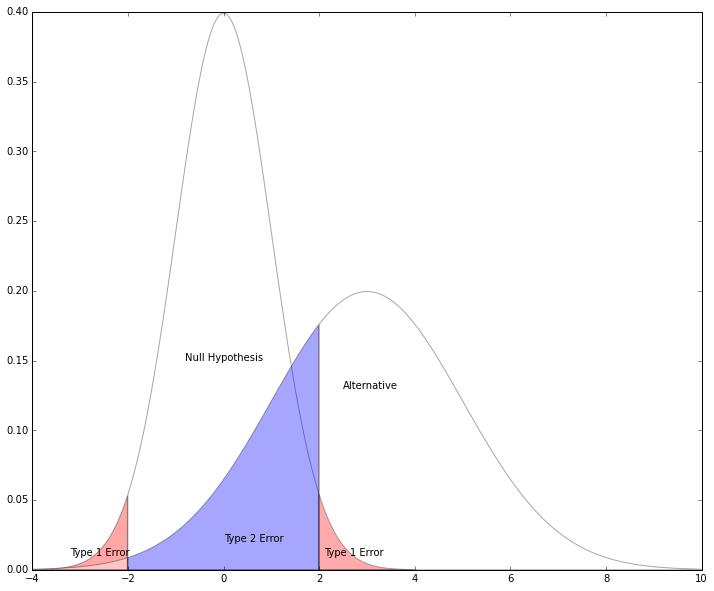

## Chi Square Test

- сравнение распределения категориальных данных

${\displaystyle X^{2}=\sum _{i=1}^{k}{\frac {(x_{i}-m_{i})^{2}}{m_{i}}}=\sum _{i=1}^{k}{{\frac {x_{i}^{2}}{m_{i}}}-n}}$

In [57]:
Sg = df.loc[mask & (df.usertype =='Subscriber'), 'gender'].value_counts()

In [58]:
Sg

1    533800
2    149348
0     12432
Name: gender, dtype: int64

In [59]:
Cg = df.loc[mask & (df.usertype =='Customer'), 'gender'].value_counts()

In [60]:
Cg

0    16222
1     2792
2     1977
Name: gender, dtype: int64

In [65]:
DF = pd.DataFrame({'Subscriber':Sg, 'Customer':Cg})
DF = DF / DF.sum()

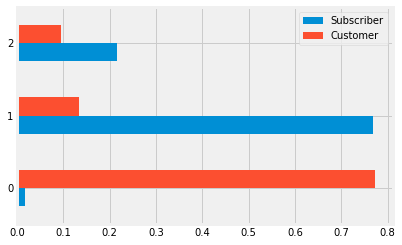

In [67]:
DF.plot(kind='barh')

In [68]:
stats.chisquare(f_obs= Cg,
                f_exp= Sg)

Power_divergenceResult(statistic=654457.5689671593, pvalue=0.0)

In [72]:
DF = pd.DataFrame({'Subscriber':Sg, 'Customer':Cg}).iloc[1:]

In [73]:
DF = DF / DF.sum()

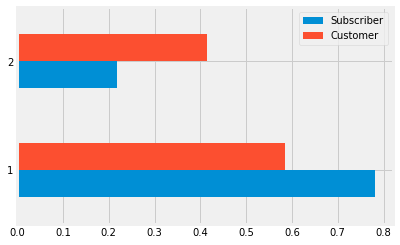

In [74]:
DF.plot(kind='barh')

In [75]:
stats.chisquare(f_obs= DF['Subscriber'],
                f_exp= DF['Customer'])

Power_divergenceResult(statistic=0.1581817926975872, pvalue=0.6908360423703623)